In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('D:/tesla.csv')

In [3]:
dataset.head()

,date,close,volume,open,high,low
0,11:34,270.49,4787699,264.50,273.88,262.2400
1,10/15/2018,259.59,6189026,259.06,263.28,254.5367
2,10/12/2018,258.78,7189257,261.00,261.99,252.0100
3,10/11/2018,252.23,8128184,257.53,262.25,249.0300
4,10/10/2018,256.88,12781560,264.61,265.51,247.7700


In [4]:
dataset['Date'] = pd.to_datetime(dataset.Date)

AttributeError: 'DataFrame' object has no attribute 'Date'

In [5]:
dataset.shape

(757, 6)

In [6]:
dataset.columns = ['date','Open', 'High', 'Low', 'Close', 'Volume']
dataset.index.name = "Date"

In [7]:
dataset['Date'] = pd.to_datetime(dataset.Date)

AttributeError: 'DataFrame' object has no attribute 'Date'

In [8]:
dataset.isnull().sum()

date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    757 non-null    object 
 1   Open    757 non-null    float64
 2   High    757 non-null    int64  
 3   Low     757 non-null    float64
 4   Close   757 non-null    float64
 5   Volume  757 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 35.6+ KB


In [10]:
dataset.isna().any()

date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [11]:
dataset.describe()

,Open,High,Low,Close,Volume
count,757.000000,7.570000e+02,757.000000,757.000000,757.000000
mean,272.645614,6.147067e+06,272.760659,277.122776,268.017399
std,58.378585,3.845859e+06,58.449827,59.194761,57.515736
min,143.670000,7.102770e+05,142.320000,154.970000,141.050000
25%,219.560000,3.783126e+06,219.640000,222.569000,216.080000
50%,277.450000,5.096751e+06,277.625000,280.789900,273.550000
75%,322.690000,7.210625e+06,321.560000,327.120000,316.560100
max,385.000000,3.359729e+07,386.690000,389.610000,379.345000


In [12]:
print(len(dataset))

757


<Axes: xlabel='Date'>

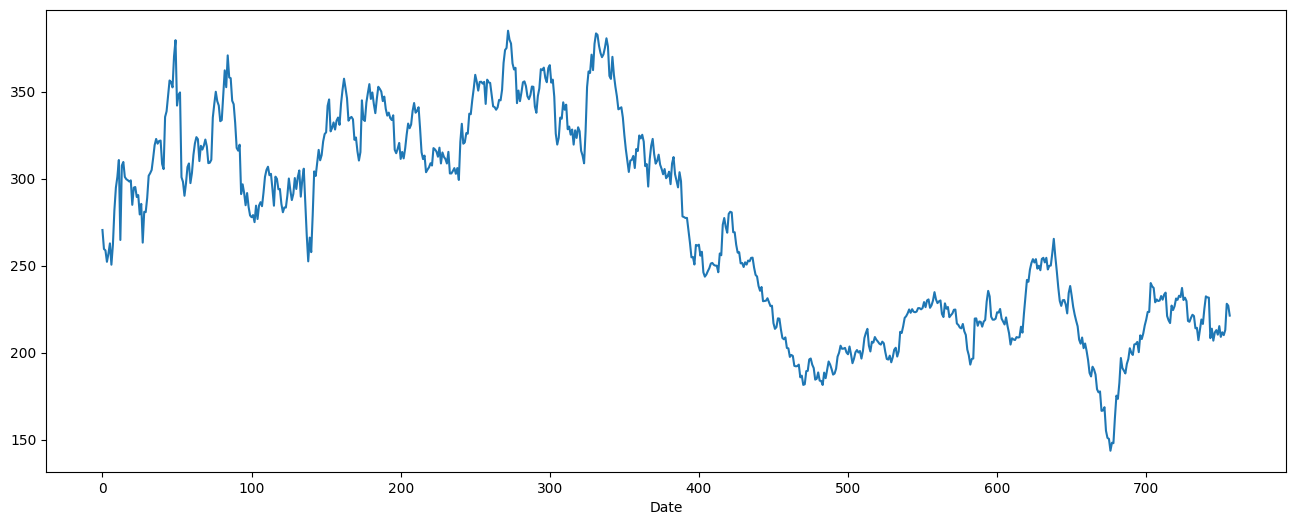

In [13]:
dataset['Open'].plot(figsize=(16,6))

In [14]:
X=dataset[['Open','High','Low','Volume']]
y=dataset['Close']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random state = 0)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3616692796.py, line 2)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [17]:
X_train.shape

(567, 4)

In [18]:
X_test.shape

(190, 4)

In [19]:
regressor.fit(X_train,y_train)

NameError: name 'regressor' is not defined

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [21]:
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
print(regressor.coef_)

[ 5.70860882e-01  3.24531875e-07  6.00135975e-01 -1.67563459e-01]


In [23]:
print(regressor.intercept_)

0.6882165720386979


In [24]:
predicted=regressor.predict(X_test)

In [25]:
print(X_test)

        Open     High      Low  Volume
Date                                  
651   226.38  3769083  221.470  220.00
678   147.99  9306754  157.105  146.00
496   202.24  5346893  201.000  200.10
79    333.01  6925089  330.120  327.50
362   325.22  5734524  321.560  318.12
...      ...      ...      ...     ...
144   309.10  4924928  313.890  308.18
609   204.66  2842028  209.050  204.02
21    294.84  6866208  290.040  288.13
601   223.04  3645792  224.990  220.75
395   254.78  3309844  255.390  253.30

[190 rows x 4 columns]


In [26]:
predicted.shape

(190,)

In [27]:
dframe=pd.DataFrame(y_test,predicted)

In [28]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [29]:
print{dfr}

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (116020319.py, line 1)

In [30]:
print(dfr)

      Actual Price  Predicted Price
Date                               
651       228.5000       227.191044
678       157.1500       158.010354
496       203.1900       204.972241
79        338.4700       336.277866
362       325.5000       327.879065
...            ...              ...
144       318.8200       315.476586
609       209.8199       209.715062
21        300.8700       297.012521
601       225.9300       227.231163
395       257.6720       258.031205

[190 rows x 2 columns]


In [31]:
dfr.head(25)

,Actual Price,Predicted Price
Date,,
651,228.5000,227.191044
678,157.1500,158.010354
496,203.1900,204.972241
79,338.4700,336.277866
362,325.5000,327.879065
40,308.5000,309.175326
449,228.0000,226.872841
27,268.3500,272.071560
389,279.6800,281.602526


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
regressor.score(X_test,y_test)

0.9988952689274032

In [34]:
import math

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))

Mean Absolute Error: 1.478981012716984


In [36]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))

Mean Squared Error: 4.032528532146936


In [37]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Root Mean Squared Error: 4.032528532146936


In [38]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Root Mean Squared Error: 2.0081156670239233


In [39]:
graph.plot(kind='bar')

NameError: name 'graph' is not defined

In [40]:
graph=dfr.head(20)

<Axes: xlabel='Date'>

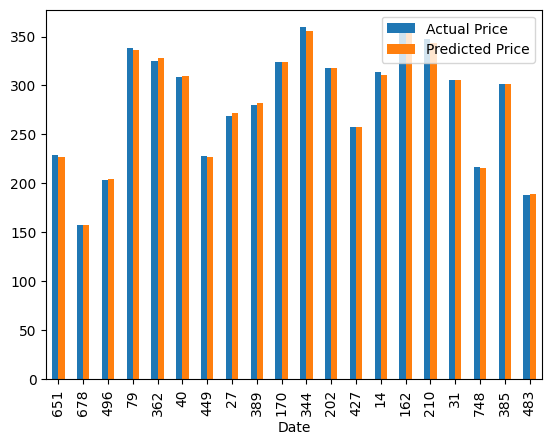

In [41]:
graph.plot(kind='bar')